<a href="https://colab.research.google.com/github/khuongduying/dataviz/blob/main/Stats01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("reshape2")
install.packages("ggpubr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [ ]:
library(ggplot2)
library(reshape2)
library(ggpubr)

In [ ]:
data(iris)

In [ ]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

1. If the law requires women to marry only men 2 years older than themselves, what is the correlation of the ages between all pairs of couples (husbands and wives)?

In [ ]:
# For example:
set.seed(1)

# Generate the age of wife and husband
wife <- round(runif(n=100, min=18, max=40)) ## wife age
husband <- wife + 2

In [ ]:
print(wife)
print(husband)

  [1] 24 26 31 38 22 38 39 33 32 19 23 22 33 26 35 29 34 40 26 35 39 23 32 21 24
 [26] 26 18 26 37 25 29 31 29 22 36 33 35 20 34 27 36 32 35 30 30 35 19 28 34 33
 [51] 29 37 28 23 20 20 25 29 33 27 38 24 28 25 32 24 29 35 20 37 25 36 26 25 28
 [76] 38 37 27 35 39 28 34 27 25 35 22 34 21 23 21 23 19 32 37 35 36 28 27 36 31
  [1] 26 28 33 40 24 40 41 35 34 21 25 24 35 28 37 31 36 42 28 37 41 25 34 23 26
 [26] 28 20 28 39 27 31 33 31 24 38 35 37 22 36 29 38 34 37 32 32 37 21 30 36 35
 [51] 31 39 30 25 22 22 27 31 35 29 40 26 30 27 34 26 31 37 22 39 27 38 28 27 30
 [76] 40 39 29 37 41 30 36 29 27 37 24 36 23 25 23 25 21 34 39 37 38 30 29 38 33


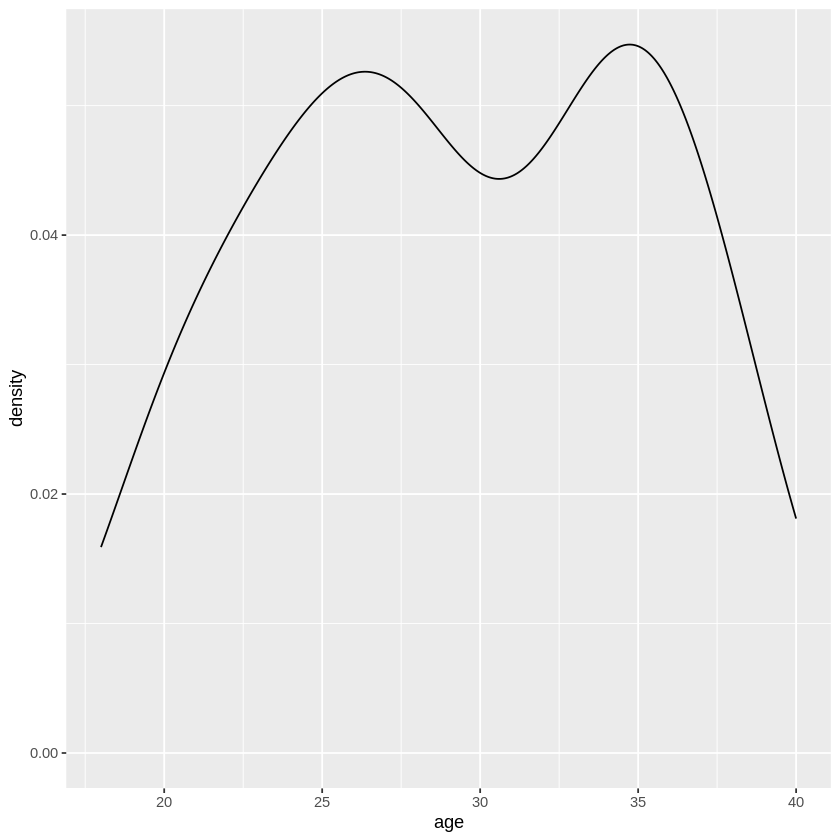

In [ ]:
ggplot(
  data.frame(age=wife),
  aes(x=age)
) + geom_density()

In [ ]:
# Calculate correlation of the ages between all pairs of couples
cor(wife, husband, use="everything")

# Covariance
cov(wife, husband)

[1] 1

[1] 35.08394

In [ ]:
age <- data.frame(wife=wife, husband=husband)

In [ ]:
long_age <- melt(age)
colnames(long_age) <- c("who","age")

No id variables; using all as measure variables



In [ ]:
head(long_age)

,who,age
,<fct>,<dbl>
1,wife,24
2,wife,26
3,wife,31
4,wife,38
5,wife,22
6,wife,38


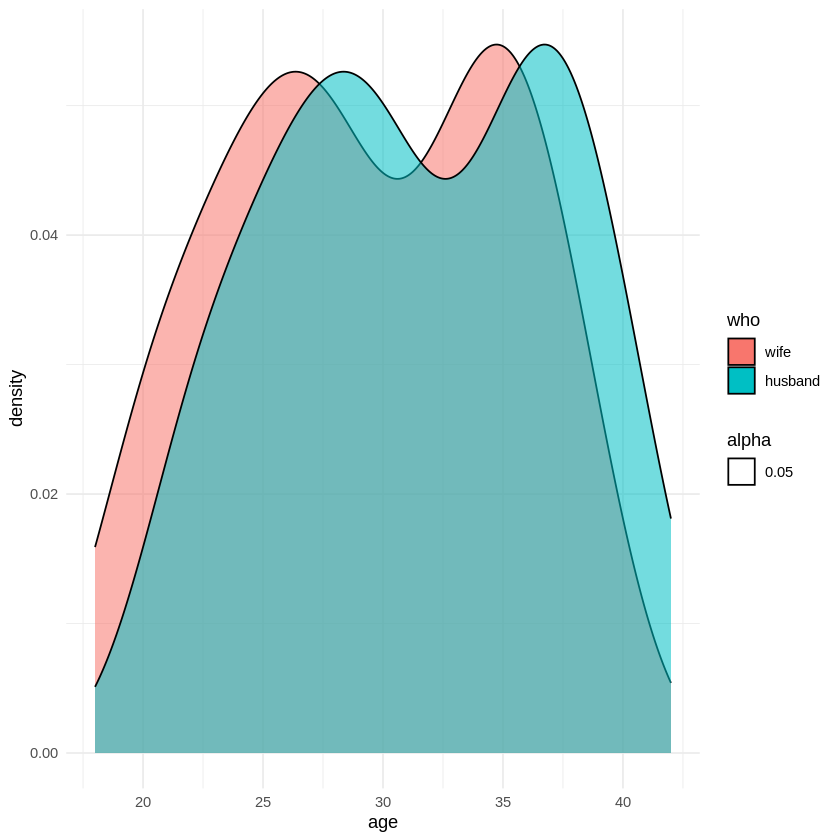

In [ ]:
ggplot(
  long_age,
  aes(x=age, fill=who, alpha=0.05)
) + geom_density() +
  theme_minimal()

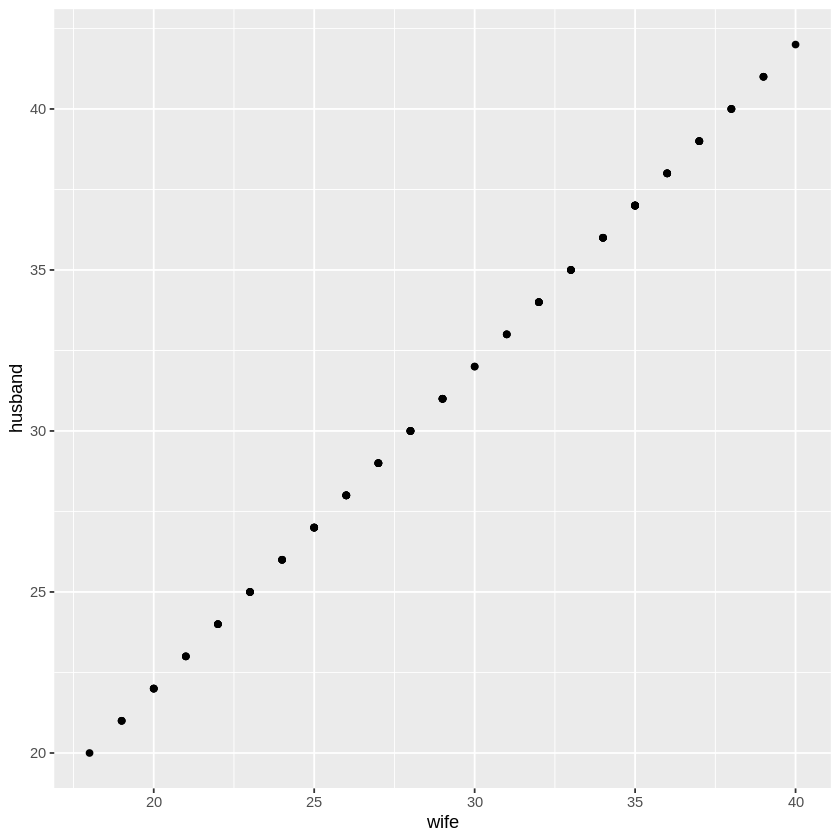

In [ ]:
ggplot(
  age,
  aes(x=wife,y=husband)
) + geom_point()

2. Use Iris data in R and do as requested:

In [ ]:
data(iris)

a. Visualize the Sepal.Length, Sepal.Width and Species.

In [ ]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


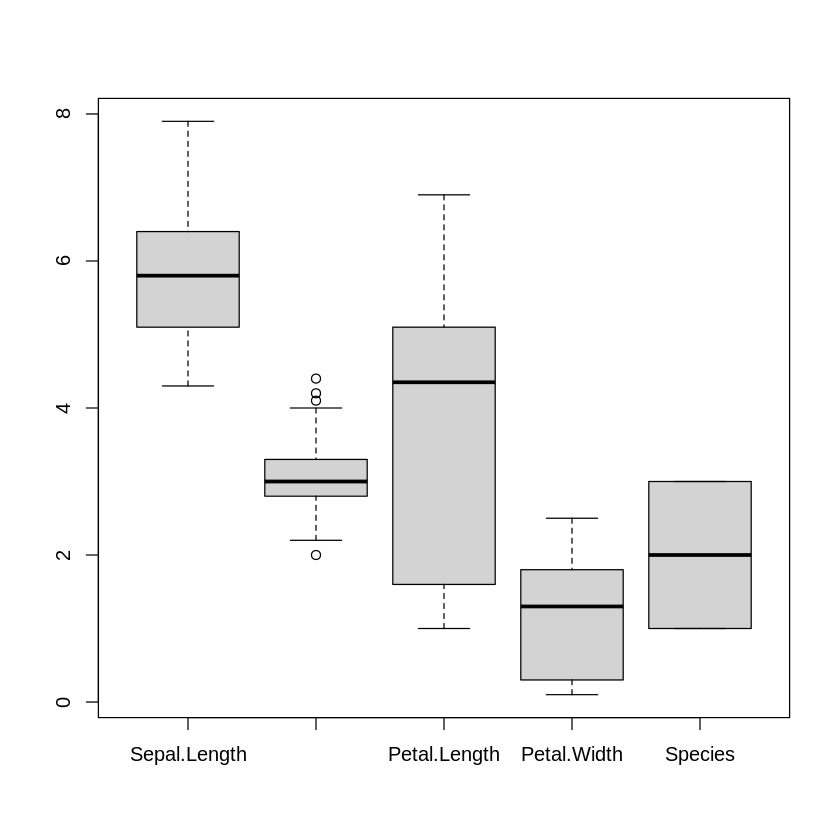

In [ ]:
boxplot(iris)

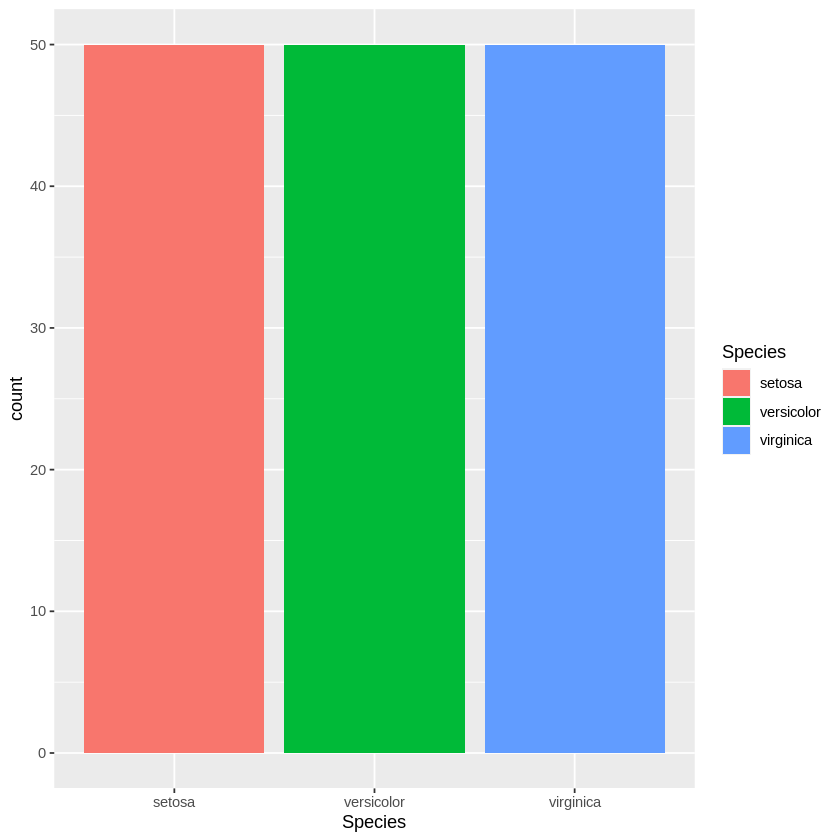

In [ ]:
ggplot(iris, aes(x=Species, fill=Species)) + geom_bar()

b. Calculate variance, covariance, correlation between Sepal.Length and Sepal.Width

`geom_smooth()` using formula = 'y ~ x'


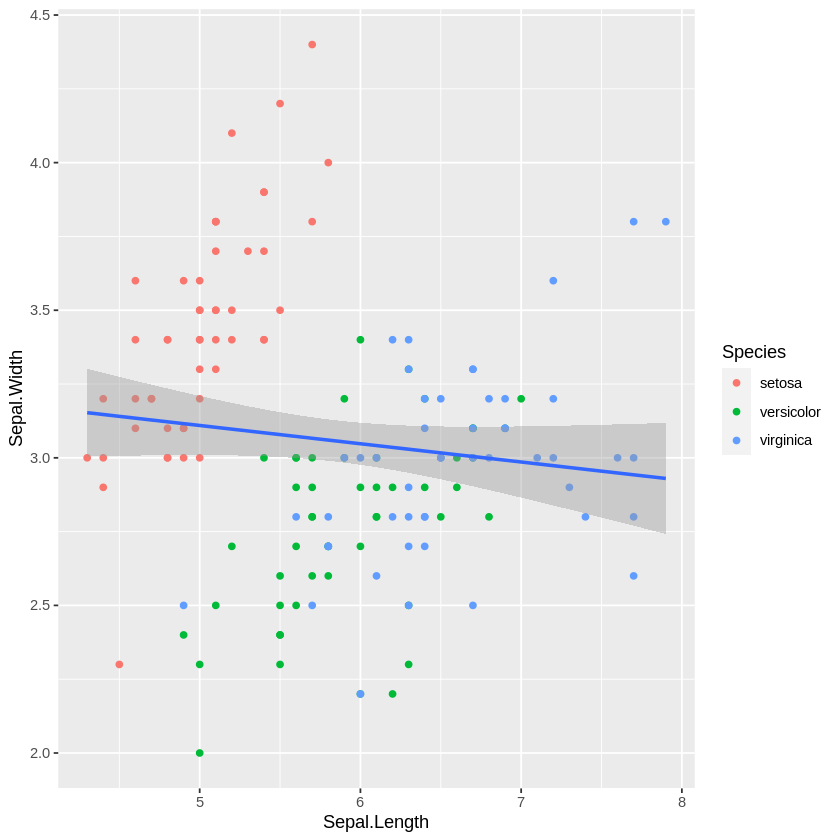

In [ ]:
# View data
ggplot(
  iris,
  aes(x=Sepal.Length, y=Sepal.Width)
) +
  geom_point(aes(color=Species)) +
  geom_smooth(method=lm)

There are no association between Sepal length and Sepal Width when comparing all species values. But there might be strong correlation within each species.

`geom_smooth()` using formula = 'y ~ x'


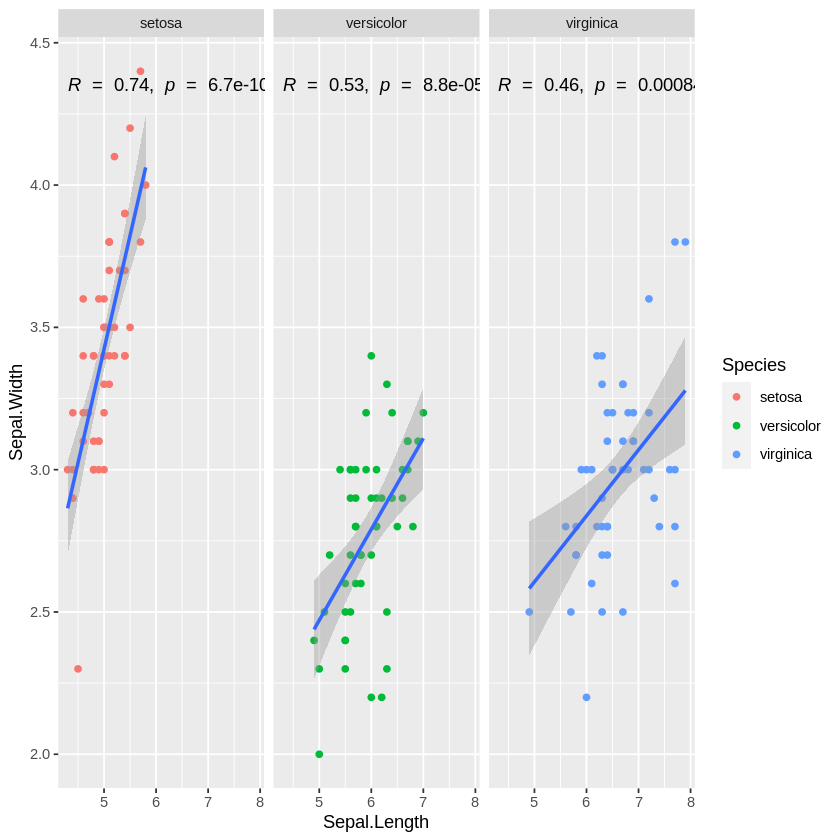

In [ ]:
# Load needed libraries
library(ggplot2)
library(ggpubr)

# View data
ggplot(
  iris,
  aes(x=Sepal.Length, y=Sepal.Width)
) +
  geom_point(aes(color=Species)) +
  geom_smooth(method=lm) +
  facet_wrap('Species', ncol=3) +
  stat_cor(method="pearson")

In [ ]:
# Variance
var(iris$Sepal.Length,
  iris$Sepal.Width,
  na.rm=T)

[1] -0.042434

In [ ]:
# subset data by species
iris.sentosa <- subset(iris, Species="sentosa")

Warning message:
“In subset.data.frame(iris, Species = "sentosa") :
 extra argument ‘Species’ will be disregarded”


In [ ]:
# Correlation
cor(iris.sentosa$Petal.Length, iris.sentosa$Sepal.Length,
  method="pearson")

# Covariance
cov(iris.sentosa$Petal.Length, iris.sentosa$Sepal.Length,
  method="pearson")

[1] 0.8717538

[1] 1.274315

In [ ]:
cor(iris$Sepal.Length, iris$Sepal.Width)

3. Use anscombe data in R and do as requested

a. Calculate the variance, covariance, and correlation between the x variable and the corresponding y variable. Give a comment.

In [ ]:
# View data structure
str(anscombe)

'data.frame':	11 obs. of  8 variables:
 $ x1: num  10 8 13 9 11 14 6 4 12 7 ...
 $ x2: num  10 8 13 9 11 14 6 4 12 7 ...
 $ x3: num  10 8 13 9 11 14 6 4 12 7 ...
 $ x4: num  8 8 8 8 8 8 8 19 8 8 ...
 $ y1: num  8.04 6.95 7.58 8.81 8.33 ...
 $ y2: num  9.14 8.14 8.74 8.77 9.26 8.1 6.13 3.1 9.13 7.26 ...
 $ y3: num  7.46 6.77 12.74 7.11 7.81 ...
 $ y4: num  6.58 5.76 7.71 8.84 8.47 7.04 5.25 12.5 5.56 7.91 ...


In [ ]:
anscombe

x1,x2,x3,x4,y1,y2,y3,y4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,8,7.24,6.13,6.08,5.25
4,4,4,19,4.26,3.10,5.39,12.50
12,12,12,8,10.84,9.13,8.15,5.56


## QQ plot normality check

In [ ]:
install.packages("palmerpenguins")
library(palmerpenguins)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
str(penguins)

tibble [344 × 8] (S3: tbl_df/tbl/data.frame)
 $ species          : Factor w/ 3 levels "Adelie","Chinstrap",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ island           : Factor w/ 3 levels "Biscoe","Dream",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ bill_length_mm   : num [1:344] 39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ bill_depth_mm    : num [1:344] 18.7 17.4 18 NA 19.3 20.6 17.8 19.6 18.1 20.2 ...
 $ flipper_length_mm: int [1:344] 181 186 195 NA 193 190 181 195 193 190 ...
 $ body_mass_g      : int [1:344] 3750 3800 3250 NA 3450 3650 3625 4675 3475 4250 ...
 $ sex              : Factor w/ 2 levels "female","male": 2 1 1 NA 1 2 1 2 NA NA ...
 $ year             : int [1:344] 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...


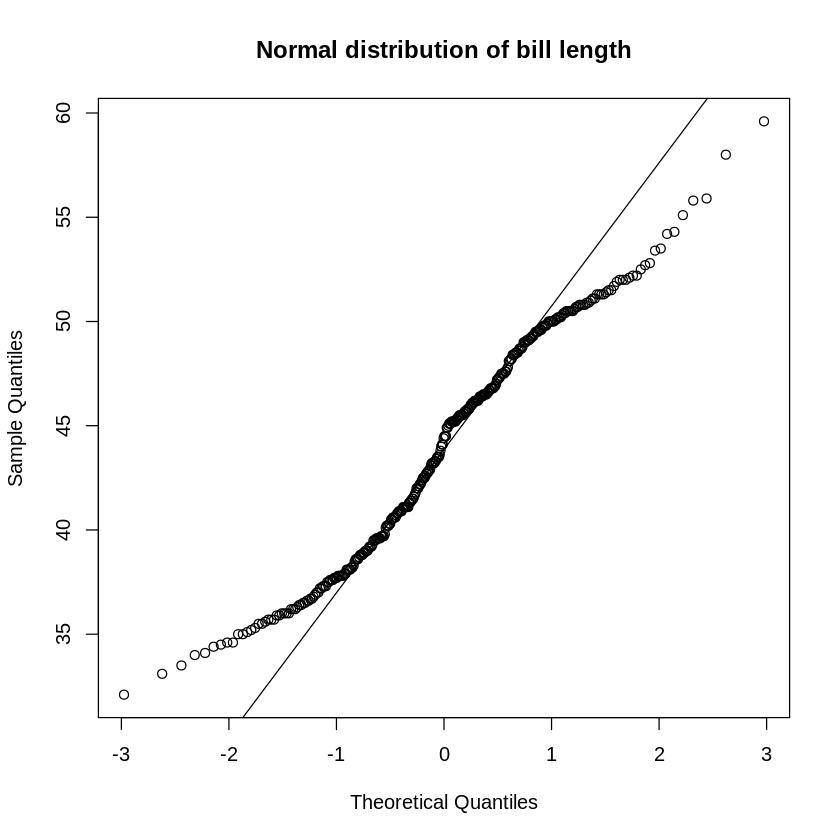

In [ ]:
qqnorm(penguins$bill_length_mm, main="Normal distribution of bill length")
qqline(penguins$bill_length_mm)

## Statistical test normality check

In [ ]:
# Shapiro-Wilk Test
shapiro.test(penguins$bill_depth_mm) ## non-normal distribution


	Shapiro-Wilk normality test

data:  penguins$bill_depth_mm
W = 0.97258, p-value = 4.419e-06


Warning message:
“Removed 2 rows containing non-finite values (`stat_density()`).”


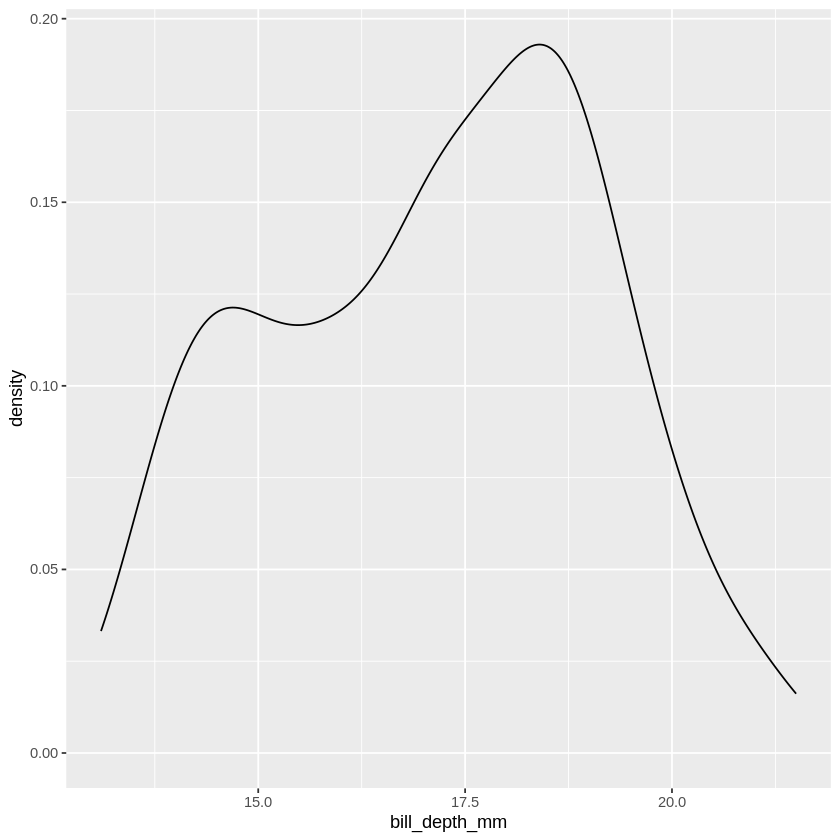

In [ ]:
ggplot(
  penguins,
  aes(x=bill_depth_mm)
) +
  geom_density()

In [ ]:
## Kolmogorov-Smirnov Test
ks.test(penguins$body_mass_g, "pnorm",
  mean=mean(penguins$body_mass_g, na.rm=T),
  sd=sd(penguins$body_mass_g, na.rm=T))

Warning message in ks.test.default(penguins$body_mass_g, "pnorm", mean = mean(penguins$body_mass_g, :
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  penguins$body_mass_g
D = 0.10408, p-value = 0.00121
alternative hypothesis: two-sided


In [ ]:
#sapply(c("male","female"), function(x) {
#  sapply(c("Adelie", "Chinstrap", "Gentoo"), function(y) {
#    shapiro.test(penguins[!is.na(penguins) & (penguins$sex == x & penguins$species == y), "body_mass_g"])$p.value
#  })
#})

## Student t-test

In [ ]:
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [ ]:
## Subset male penguins
penguins_male <- penguins[penguins$sex == "male", "body_mass_g"]

## Subset female penguins
penguins_female <- penguins[penguins$sex == "female", "body_mass_g"]


In [ ]:
summary(penguins_male)
summary(penguins_female)

  body_mass_g  
 Min.   :3250  
 1st Qu.:3900  
 Median :4300  
 Mean   :4546  
 3rd Qu.:5312  
 Max.   :6300  
 NA's   :11    

  body_mass_g  
 Min.   :2700  
 1st Qu.:3350  
 Median :3650  
 Mean   :3862  
 3rd Qu.:4550  
 Max.   :5200  
 NA's   :11    

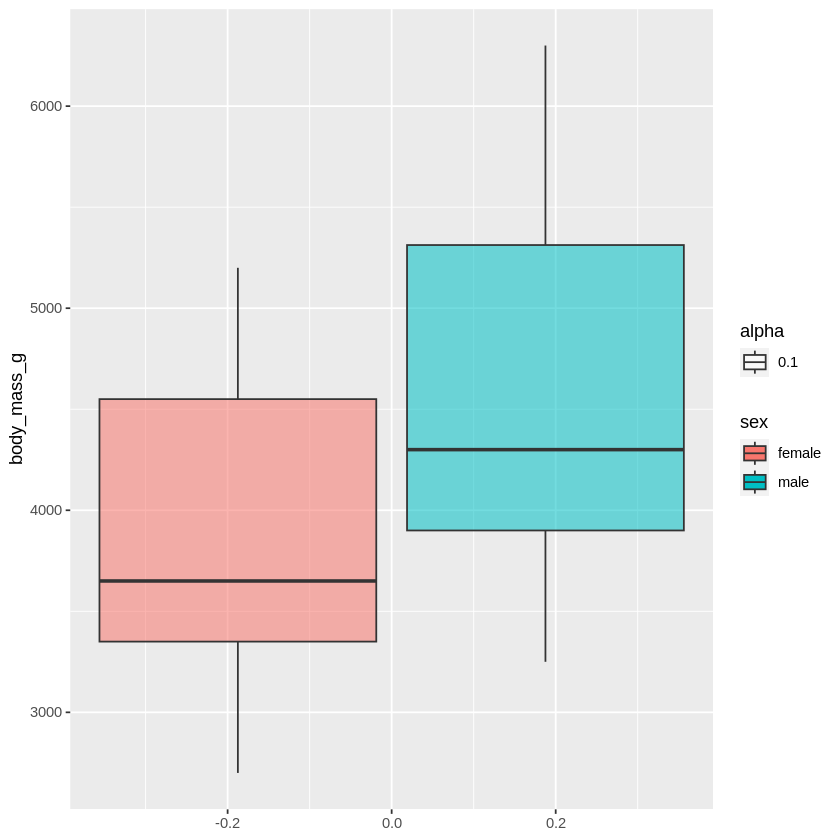

In [ ]:
ggplot(
  na.omit(penguins),
  aes(y=body_mass_g, fill=sex, alpha=0.1)
) +
  geom_boxplot()


	Shapiro-Wilk normality test

data:  penguins_male$body_mass_g
W = 0.92504, p-value = 1.227e-07


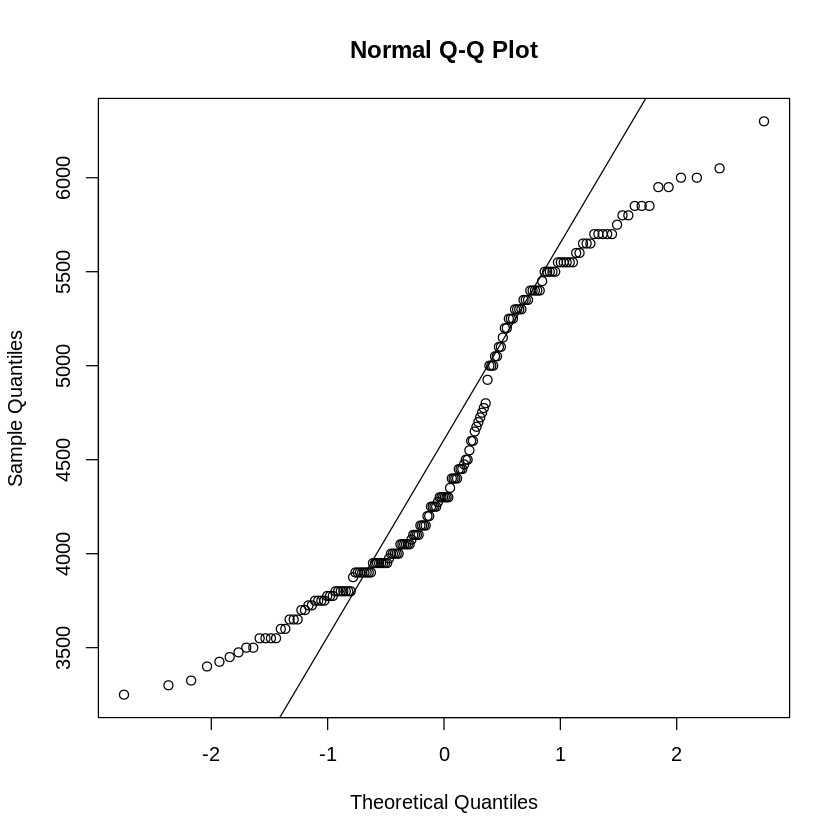

In [ ]:
## QQplot
qqnorm(penguins_male$body_mass_g)
qqline(penguins_male)

## Sapiro-Wilk test
shapiro.test(penguins_male$body_mass_g) ## pvalue < 0.05 - Non-normal distribution

In [ ]:
## t-test
ttest1 <- t.test(penguins_male, penguins_female)

## p-value
ttest1$p.value

## estimate
ttest1$estimate

[1] 4.793891e-16

mean of x mean of y 
 4545.685  3862.273


	Shapiro-Wilk normality test

data:  penguins$bill_depth_mm
W = 0.97258, p-value = 4.419e-06


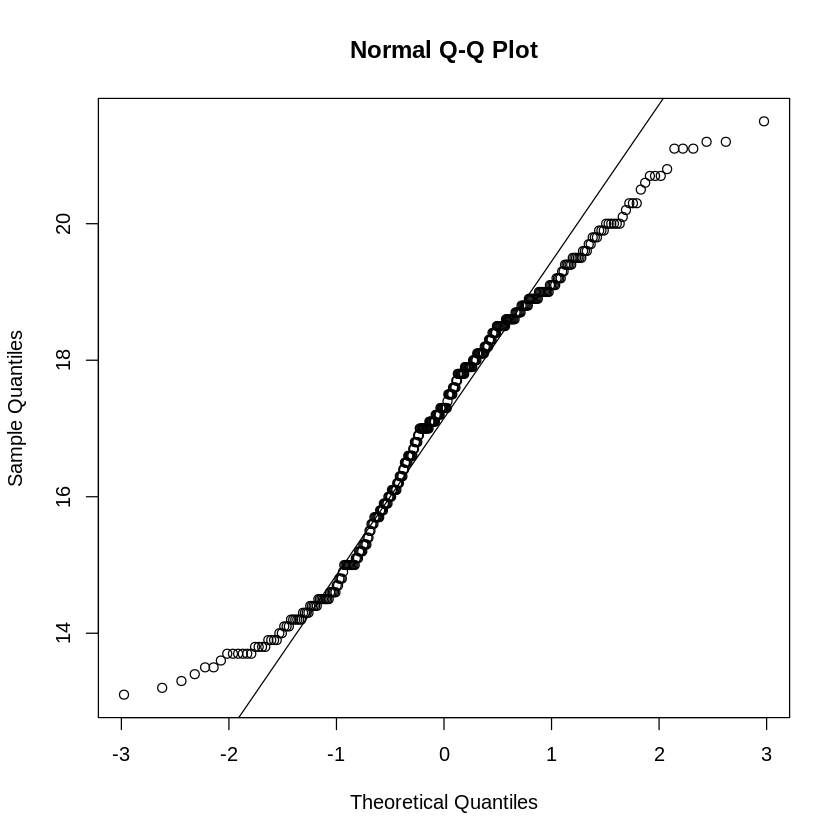

In [ ]:
qqnorm(penguins$bill_depth_mm)
qqline(penguins$bill_depth_mm)

## shapiro test normality
shapiro.test(penguins$bill_depth_mm)